In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
from lint.models import Token

from numpy.random import multinomial

def bootstrap(token, n=1000, *args, **kwargs):
    
    series = Token.token_series(token, *args, **kwargs)
    
    samples = multinomial(series.sum(), series/series.sum(), n)
    
    return samples / series.sum()

In [79]:
token = 'had'

In [80]:
b1 = bootstrap(token, year1=1840, year2=1860)
b2 = bootstrap(token, year1=1980, year2=2000)

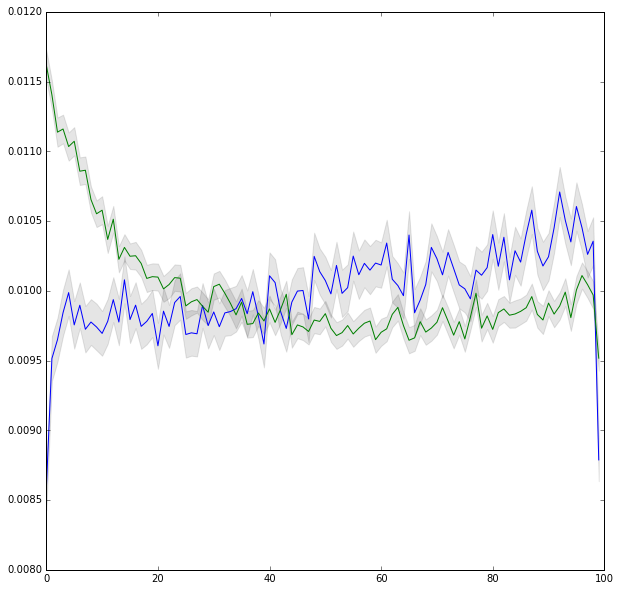

In [81]:
plt.figure(figsize=(10,10))

plt.plot(b1.mean(0))

plt.fill_between(
    range(100),
    b1.mean(0) + 2*b1.std(0),
    b1.mean(0) - 2*b1.std(0),
    color='black',
    alpha=0.1,
)

plt.plot(b2.mean(0))

plt.fill_between(
    range(100),
    b2.mean(0) + 2*b2.std(0),
    b2.mean(0) - 2*b2.std(0),
    color='black',
    alpha=0.1,
)

plt.show()